In [1]:
import cv2 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL  import Image
import os

In [2]:
import ffmpeg
def check_rotation(path_video_file):
    # this returns meta-data of the video file in form of a dictionary
    meta_dict = ffmpeg.probe(path_video_file)

    # from the dictionary, meta_dict['streams'][0]['tags']['rotate'] is the key
    # we are looking for
    rotateCode = None
  #  print(meta_dict['streams'][0]['tags'].keys())
    if 'rotate' in meta_dict['streams'][0]['tags'].keys():      
        if int(meta_dict['streams'][0]['tags']['rotate']) == 90:
            rotateCode = cv2.ROTATE_90_CLOCKWISE
        elif int(meta_dict['streams'][0]['tags']['rotate']) == 180:
            rotateCode = cv2.ROTATE_180
        elif int(meta_dict['streams'][0]['tags']['rotate']) == 270:
            rotateCode = cv2.ROTATE_90_COUNTERCLOCKWISE

    return rotateCode

# labelling

fps: 29.556947157587597 
total frames: 425.0


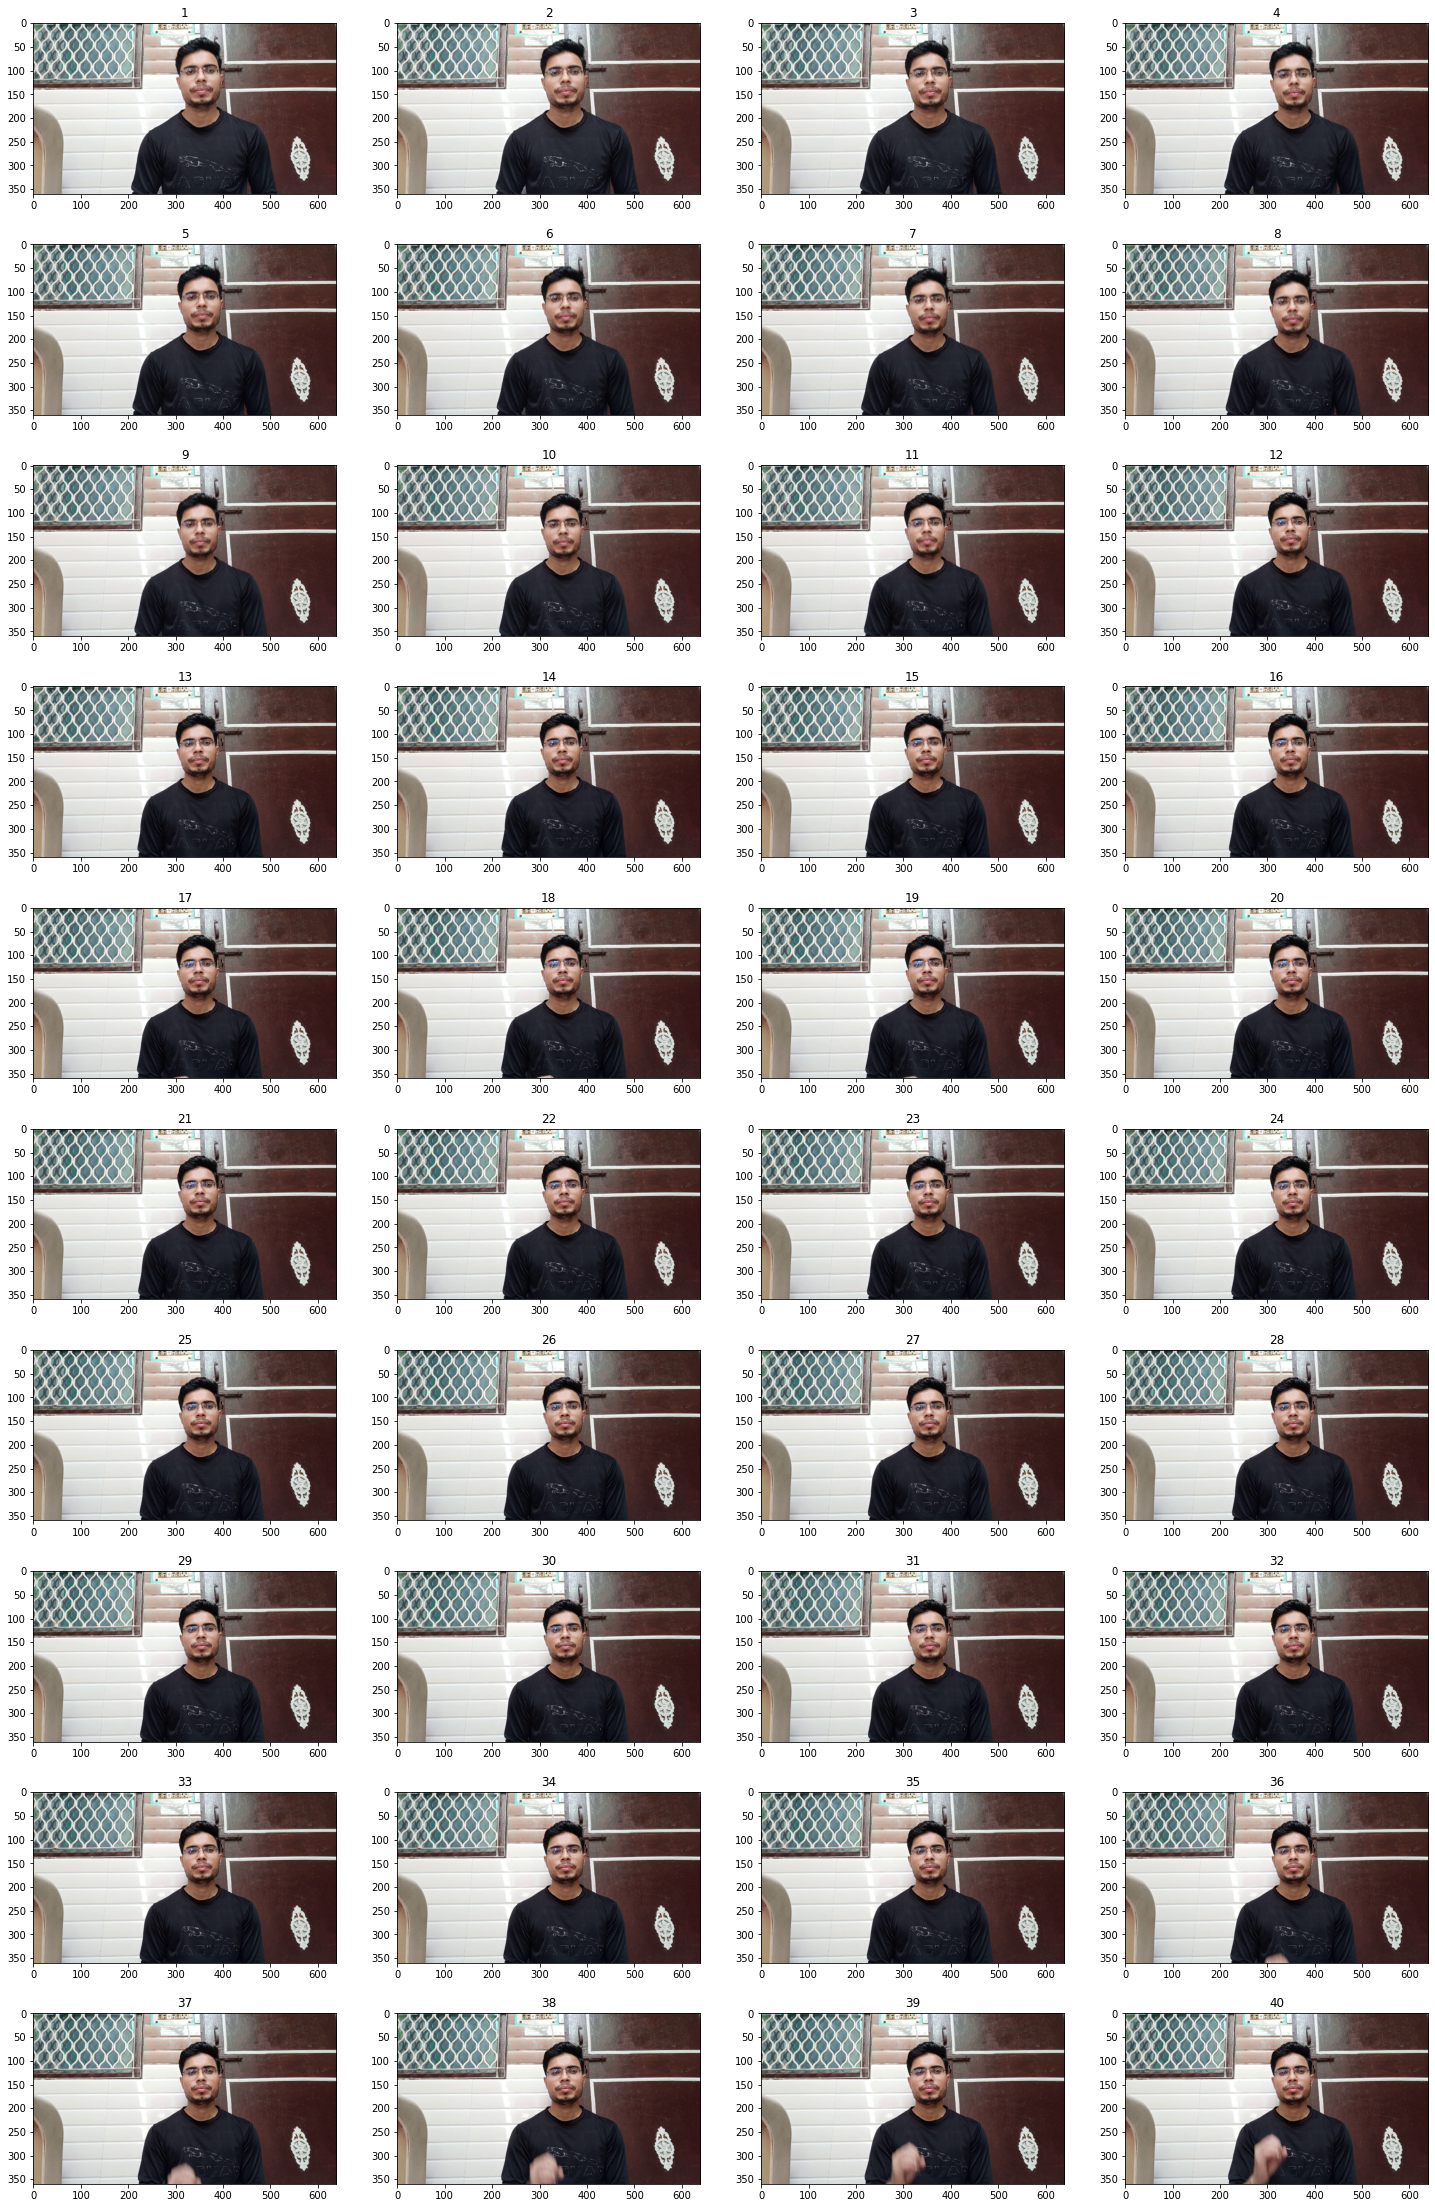

e


<Figure size 1800x2880 with 0 Axes>

In [3]:
vid_path="./my_data/ndata/nf (1).mp4"

cap=cv2.VideoCapture(vid_path)
rotateCode=check_rotation(vid_path)
fps=cap.get(cv2.CAP_PROP_FPS)
fp=0
tf=cap.get(cv2.CAP_PROP_FRAME_COUNT)
print('fps:',fps,'\ntotal frames:',tf)
cap.set(cv2.CAP_PROP_POS_FRAMES,fp)
k=fp
rows,cols=10,4
img_arr_prev=None
itr=fp//(rows*cols)
nb=tf//(rows*cols)
try:
    while True:
        img_arr=[]
        if itr<nb:
            for i in range(rows*cols):
                _,frame=cap.read()
                if rotateCode is not None:
                    frame = cv2.rotate(frame, rotateCode)
                
                frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
                frame=Image.fromarray(frame)
                frame=frame.resize((640,360))
                frame=np.array(frame)
                img_arr.append(frame)
                k+=1

            img_arr=np.array(img_arr).reshape((rows,cols,360,640,3))
            fig,ax=plt.subplots(rows,cols,figsize=(25,40))
            ln=itr*rows*cols+1
            un=ln+rows*cols-1
            for i in range(rows):
                for j in range(cols):
                    ax[i,j].imshow(img_arr[i,j])
                    ax[i,j].set_title(ln+i*cols+j)
                    
        elif itr==nb:
            rows2=int((tf-nb*rows*cols)//cols)
            for i in range(rows2*cols):
                _,frame=cap.read()
                frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
                frame=Image.fromarray(frame)
                frame=frame.resize((640,360))
                frame=np.array(frame)
                img_arr.append(frame)
                k+=1
            
            img_arr=np.array(img_arr).reshape((rows2,cols,360,640,3))
            fig,ax=plt.subplots(rows2,cols,figsize=(25,40))
            ln=itr*rows*cols+1
            un=ln+rows2*cols-1
            for i in range(rows2):
                for j in range(cols):
                    if rows2==1:
                        ax[j].imshow(img_arr[i,j])
                        ax[j].set_title(ln+i*cols+j) 
                    else:
                        ax[i,j].imshow(img_arr[i,j])
                        ax[i,j].set_title(ln+i*cols+j)
                
        else: break
                    
        if itr!=0:
            inp=input()
            if inp in ['e','E']:
                break
            print("\t\t\t\t\t...............Next Batch({}-{})...............".format(ln,un))
            
        plt.show()
        itr+=1
finally:
    plt.clf()
    cap.release()   

# label verification
    

In [3]:
path='./my_data/ndata'
lst=[]
cols=6
df=pd.read_excel(r'E:\\Faiz\\Projects\\My_Projects\\ISLR\my_data\\ntotal_data.xlsx')
#print(df.head())
cont=True
k=0
try:
    for vd,sf,ef  in zip(df['video'],df['start frame'],df['end frame']):
        k+=1
        if k in lst or cont:
            cont=True
            vid_path=path+'/'+vd+'.mp4'
            if not os.path.exists(vid_path):
                vid_path=path+'/'+vd+'.mov'
                if not os.path.exists(vid_path):
                    print('path is not exist')
                    break
            rotateCode=check_rotation(vid_path) 
            ln=int(ef-sf+1)
            cap=cv2.VideoCapture(vid_path)
            cap.set(cv2.CAP_PROP_POS_FRAMES,sf)
            frm_arr=[]
            for i in range(ln):
                _,frame=cap.read()
                if rotateCode is not None:
                    frame = cv2.rotate(frame, rotateCode)                
                #frame=centercrop(frame)
                frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
                pframe=Image.fromarray(frame)
                pframe=pframe.resize((112,112))
                frame=np.array(pframe)
            #    frame=skin_masking(frame)
                frm_arr.append(frame)
            rows=(ln-1)//cols+1
            fig,ax=plt.subplots(rows,cols,figsize=(cols*2.25+10,rows*2.5+5))
            for i in range(ln):
                ax[i//cols,i%cols].imshow(frm_arr[i])
                ax[i//cols,i%cols].set_title(sf+i)
            plt.show()
            inp=input()   
            if inp in ['e','E']:
                break
            print('\t\t\t\t\t\t\t............Next.............')
finally:
    cap.release()
    

        

ValueError: Your version of xlrd is 2.0.1. In xlrd >= 2.0, only the xls format is supported. Install openpyxl instead.